
# **First Project: Sentiment Analysis using Machine Learning**


Submission **Belajar Pengembangan Machine Learning – Proyek Analisis Sentimen** mengharuskan peserta melakukan scraping data secara mandiri menggunakan Python dari berbagai sumber seperti PlayStore, X, Instagram, atau e-commerce, dengan jumlah minimal 3.000 sampel. Data yang diperoleh harus melalui proses ekstraksi fitur dan pelabelan sebelum digunakan untuk pelatihan model dengan algoritma machine learning yang sesuai.

Model yang dikembangkan harus mencapai akurasi minimal 85% pada testing set agar dianggap memiliki kinerja yang baik dalam klasifikasi sentimen. Untuk penilaian tambahan, peserta disarankan menggunakan algoritma deep learning dengan akurasi training dan testing set di atas 92%, serta dataset minimal 10.000 sampel yang mencakup tiga kelas sentimen. Selain itu, peserta diminta melakukan tiga skema pelatihan berbeda dengan kombinasi algoritma, metode ekstraksi fitur, atau pembagian data, serta menyertakan proses inference atau testing yang menghasilkan output kategorikal seperti negatif, netral, dan positif dalam file `.ipynb` atau `.py`.


Submission harus menggunakan Python dan mencakup file notebook pelatihan model (`.ipynb`), kode scraping (`.py` atau `.ipynb`), file `requirements.txt`, dataset hasil scraping dalam format `.csv` atau `.json`, serta folder yang telah dikompresi dalam format zip. Notebook yang dikirim harus sudah dijalankan terlebih dahulu agar reviewer dapat langsung melihat output tanpa perlu mengeksekusinya ulang.

**Nama:** Sarah Adibah

**Email:** sarahadibah@06gmail.com

**Referensi**
[Sentimen Analisis pada Aplikasi By.U.](https://colab.research.google.com/drive/173RsZ-l3SAd2VZwKisXisxYbKKsp28Qd?usp=sharing)




# **1. Library Install**

In [1]:
!pip install --upgrade nltk
!pip install sastrawi
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00


In [2]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installation

# **2. Library Import**

In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preprocessing NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' resource


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
print(tf.__version__)

2.15.0


# **4. Loading Dataset**

In [30]:
# Assuming your data is in a CSV file named 'ulasan_aplikasi.csv'
# Replace 'ulasan_aplikasi.csv' with the actual file path
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analyst Sentiment/ulasan_aplikasi (2).csv')
app_reviews_df = df

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            10000 non-null  int64 
 1   reviewId              10000 non-null  object
 2   userName              10000 non-null  object
 3   userImage             10000 non-null  object
 4   content               10000 non-null  object
 5   score                 10000 non-null  int64 
 6   thumbsUpCount         10000 non-null  int64 
 7   reviewCreatedVersion  7589 non-null   object
 8   at                    10000 non-null  object
 9   replyContent          1472 non-null   object
 10  repliedAt             1472 non-null   object
 11  appVersion            7589 non-null   object
dtypes: int64(3), object(9)
memory usage: 937.6+ KB


In [33]:
app_reviews_df = app_reviews_df.drop(columns=[
    'reviewId', 'userImage', 'reviewCreatedVersion',
    'at', 'replyContent', 'repliedAt', 'appVersion'
])

In [34]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [35]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10000 non-null  int64 
 1   userName       10000 non-null  object
 2   content        10000 non-null  object
 3   score          10000 non-null  int64 
 4   thumbsUpCount  10000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 390.8+ KB


In [36]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

In [37]:
# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
clean_df.shape

(10000, 5)

# **5. Data Preprocessing**

## **5.1 Data Cleaning**

In [38]:
import re # add import for re module
import string # add import for string module

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [39]:
# @title Indonesian Slangwords
slangwords = {'@': 'di', 'gini': 'begini', 'apk': 'aplikasi', 'pdhl': 'padahal', 'tdkdpt': 'tidak dapat', 'dg': 'dengan', 'dk': 'tidak', 'si': 'sih', 'c': 'sih', 'gabisa': 'tidak bisa', 'tru': 'trus', 'plu': 'plus', 'tetep': 'tetap', 'eror': 'error', 'gitu': 'begitu', 'sdh': 'sudah', 'udh': 'sudah', 'g': 'bukan', 'gk': 'bukan', 'dr': 'dari', 'ny': 'nya', 'ko': 'kok', 'skrg': 'sekarang', 'x': 'kali', 'app': 'aplikasi', 'rb': 'ribu', 'emang': 'memang', 'pa': 'apa', 'bagu': 'bagus', 'sya': 'saya', 'min': 'admin', 'sm': 'sama', 'abis': 'habis', 'wtb': 'beli', 'masi': 'masih', 'wts': 'jual', 'wtt': 'tukar', 'bgt': 'banget', 'maks': 'maksimal', 'plisss': 'tolong', 'bgttt': 'banget', 'indo': 'indonesia', 'bgtt': 'banget', 'ad': 'ada', 'rv': 'redvelvet', 'plis': 'tolong', 'pls': 'tolong', 'cr': 'sumber', 'cod': 'bayar ditempat', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 'banget', 'bg': 'abang', 'bgmn': 'bagaimana', 'bgt': 'banget', 'bijimane': 'bagaimana', 'bintal': 'bimbingan mental', 'bkl': 'akan', 'bknnya': 'bukannya', 'blegug': 'bodoh', 'blh': 'boleh', 'bln': 'bulan', 'blum': 'belum', 'bnci': 'benci', 'bnran': 'yang benar', 'bodor': 'lucu', 'bokap': 'ayah', 'boker': 'buang air besar', 'bokis': 'bohong', 'boljug': 'boleh juga', 'bonek': 'bocah nekat', 'boyeh': 'boleh', 'br': 'baru', 'brg': 'bareng', 'bro': 'saudara laki-laki', 'bru': 'baru', 'bs': 'bisa', 'bsen': 'bosan', 'bt': 'buat', 'btw': 'ngomong-ngomong', 'buaya': 'tidak setia', 'bubbu': 'tidur', 'bubu': 'tidur', 'bumil': 'ibu hamil', 'bw': 'bawa', 'bwt': 'buat', 'byk': 'banyak', 'byrin': 'bayarkan', 'cabal': 'sabar', 'cadas': 'keren', 'calo': 'makelar', 'can': 'belum', 'capcus': 'pergi', 'caper': 'cari perhatian', 'ce': 'cewek', 'cekal': 'cegah tangkal', 'cemen': 'penakut', 'cengengesan': 'tertawa', 'cepet': 'cepat', 'cew': 'cewek', 'chuyunk': 'sayang', 'cimeng': 'ganja', 'cipika cipiki': 'cium pipi kanan cium pipi kiri', 'ciyh': 'sih', 'ckepp': 'cakep', 'ckp': 'cakep', 'cmiiw': "correct me if i'm wrong", 'cmpur': 'campur', 'cong': 'banci', 'cinlok': 'cinta lokasi', 'cowwyy': 'maaf', 'cp': 'siapa', 'cpe': 'capek', 'cppe': 'capek', 'cucok': 'cocok', 'cuex': 'cuek', 'cumi': 'Cuma miscall', 'cups': 'culun', 'curanmor': 'pencurian kendaraan bermotor', 'curcol': 'curahan hati colongan', 'cwek': 'cewek', 'cyin': 'cinta', 'd': 'di', 'dah': 'deh', 'dapet': 'dapat', 'de': 'adik', 'dek': 'adik', 'demen': 'suka', 'deyh': 'deh', 'dgn': 'dengan', 'diancurin': 'dihancurkan', 'dimaafin': 'dimaafkan', 'dimintak': 'diminta', 'disono': 'di sana', 'dket': 'dekat', 'dkk': 'dan kawan-kawan', 'dll': 'dan lain-lain', 'dlu': 'dulu', 'dngn': 'dengan', 'dodol': 'bodoh', 'doku': 'uang', 'dongs': 'dong', 'dpt': 'dapat', 'dri': 'dari', 'drmn': 'darimana', 'drtd': 'dari tadi', 'dst': 'dan seterusnya', 'dtg': 'datang', 'duh': 'aduh', 'duren': 'durian', 'ed': 'edisi', 'egp': 'emang gue pikirin', 'eke': 'aku', 'elu': 'kamu', 'emangnya': 'memangnya', 'emng': 'memang', 'endak': 'tidak', 'enggak': 'tidak', 'envy': 'iri', 'ex': 'mantan', 'fax': 'facsimile', 'fifo': 'first in first out', 'folbek': 'follow back', 'fyi': 'sebagai informasi', 'gaada': 'tidak ada uang', 'gag': 'tidak', 'gaje': 'tidak jelas', 'gak papa': 'tidak apa-apa', 'gan': 'juragan', 'gaptek': 'gagap teknologi', 'gatek': 'gagap teknologi', 'gawe': 'kerja', 'gbs': 'tidak bisa', 'gebetan': 'orang yang disuka', 'geje': 'tidak jelas', 'gepeng': 'gelandangan dan pengemis', 'ghiy': 'lagi', 'gile': 'gila', 'gimana': 'bagaimana', 'gino': 'gigi nongol', 'githu': 'begitu', 'gj': 'tidak jelas', 'gmana': 'bagaimana', 'gn': 'begini', 'goblok': 'bodoh', 'golput': 'golongan putih', 'gowes': 'mengayuh sepeda', 'gpny': 'tidak punya', 'gr': 'gede rasa', 'gretongan': 'gratisan', 'gtau': 'tidak tahu', 'gua': 'saya', 'guoblok': 'goblok', 'gw': 'saya', 'ha': 'tertawa', 'haha': 'tertawa', 'hallow': 'halo', 'hankam': 'pertahanan dan keamanan', 'hehe': 'he', 'helo': 'halo', 'hey': 'hai', 'hlm': 'halaman', 'hny': 'hanya', 'hoax': 'isu bohong', 'hr': 'hari', 'hrus': 'harus', 'hubdar': 'perhubungan darat', 'huff': 'mengeluh', 'hum': 'rumah', 'humz': 'rumah', 'ilang': 'hilang', 'ilfil': 'tidak suka', 'imho': 'in my humble opinion', 'imoetz': 'imut', 'item': 'hitam', 'itungan': 'hitungan', 'iye': 'iya', 'ja': 'saja', 'jadiin': 'jadi', 'jaim': 'jaga image', 'jayus': 'tidak lucu', 'jdi': 'jadi', 'jem': 'jam', 'jga': 'juga', 'jgnkan': 'jangankan', 'jir': 'anjing', 'jln': 'jalan', 'jomblo': 'tidak punya pacar', 'jubir': 'juru bicara', 'jutek': 'galak', 'k': 'ke', 'kab': 'kabupaten', 'kabor': 'kabur', 'kacrut': 'kacau', 'kadiv': 'kepala divisi', 'kagak': 'tidak', 'kalo': 'kalau', 'kampret': 'sialan', 'kamtibmas': 'keamanan dan ketertiban masyarakat', 'kamuwh': 'kamu', 'kanwil': 'kantor wilayah', 'karna': 'karena', 'kasubbag': 'kepala subbagian', 'katrok': 'kampungan', 'kayanya': 'kayaknya', 'kbr': 'kabar', 'kdu': 'harus', 'kec': 'kecamatan', 'kejurnas': 'kejuaraan nasional', 'kekeuh': 'keras kepala', 'kel': 'kelurahan', 'kemaren': 'kemarin', 'kepengen': 'mau', 'kepingin': 'mau', 'kepsek': 'kepala sekolah', 'kesbang': 'kesatuan bangsa', 'kesra': 'kesejahteraan rakyat', 'ketrima': 'diterima', 'kgiatan': 'kegiatan', 'kibul': 'bohong', 'kimpoi': 'kawin', 'kl': 'kalau', 'klianz': 'kalian', 'kloter': 'kelompok terbang', 'klw': 'kalau', 'km': 'kamu', 'kmps': 'kampus', 'kmrn': 'kemarin', 'knal': 'kenal', 'knp': 'kenapa', 'kodya': 'kota madya', 'komdis': 'komisi disiplin', 'komsov': 'komunis sovyet', 'kongkow': 'kumpul bareng teman-teman', 'kopdar': 'kopi darat', 'korup': 'korupsi', 'kpn': 'kapan', 'krenz': 'keren', 'krm': 'kirim', 'kt': 'kita', 'ktmu': 'ketemu', 'ktr': 'kantor', 'kuper': 'kurang pergaulan', 'kw': 'imitasi', 'kyk': 'seperti', 'la': 'lah', 'lam': 'salam', 'lamp': 'lampiran', 'lanud': 'landasan udara', 'latgab': 'latihan gabungan', 'lebay': 'berlebihan', 'leh': 'boleh', 'lelet': 'lambat', 'lemot': 'lambat', 'lgi': 'lagi', 'lgsg': 'langsung', 'liat': 'lihat', 'litbang': 'penelitian dan pengembangan', 'lmyn': 'lumayan', 'lo': 'kamu', 'loe': 'kamu', 'lola': 'lambat berfikir', 'louph': 'cinta', 'low': 'kalau', 'lp': 'lupa', 'luber': 'langsung, umum, bebas, dan rahasia', 'luchuw': 'lucu', 'lum': 'belum', 'luthu': 'lucu', 'lwn': 'lawan', 'maacih': 'terima kasih', 'mabal': 'bolos', 'macem': 'macam', 'macih': 'masih', 'maem': 'makan', 'magabut': 'makan gaji buta', 'maho': 'homo', 'mak jang': 'kaget', 'maksain': 'memaksa', 'malem': 'malam', 'mam': 'makan', 'maneh': 'kamu', 'maniez': 'manis', 'mao': 'mau', 'masukin': 'masukkan', 'melu': 'ikut', 'mepet': 'dekat sekali', 'mgu': 'minggu', 'migas': 'minyak dan gas bumi', 'mikol': 'minuman beralkohol', 'miras': 'minuman keras', 'mlah': 'malah', 'mngkn': 'mungkin', 'mo': 'mau', 'mokad': 'mati', 'moso': 'masa', 'mpe': 'sampai', 'msk': 'masuk', 'mslh': 'masalah', 'mt': 'makan teman', 'mubes': 'musyawarah besar', 'mulu': 'melulu', 'mumpung': 'selagi', 'munas': 'musyawarah nasional', 'muntaber': 'muntah dan berak', 'musti': 'mesti', 'muupz': 'maaf', 'mw': 'now watching', 'n': 'dan', 'nanam': 'menanam', 'nanya': 'bertanya', 'napa': 'kenapa', 'napi': 'narapidana', 'napza': 'narkotika, alkohol, psikotropika, dan zat adiktif ', 'narkoba': 'narkotika, psikotropika, dan obat terlarang', 'nasgor': 'nasi goreng', 'nda': 'tidak', 'ndiri': 'sendiri', 'ne': 'ini', 'nekolin': 'neokolonialisme', 'nembak': 'menyatakan cinta', 'ngabuburit': 'menunggu berbuka puasa', 'ngaku': 'mengaku', 'ngambil': 'mengambil', 'nganggur': 'tidak punya pekerjaan', 'ngapah': 'kenapa', 'ngaret': 'terlambat', 'ngasih': 'memberikan', 'ngebandel': 'berbuat bandel', 'ngegosip': 'bergosip', 'ngeklaim': 'mengklaim', 'ngeksis': 'menjadi eksis', 'ngeles': 'berkilah', 'ngelidur': 'menggigau', 'ngerampok': 'merampok', 'ngga': 'tidak', 'ngibul': 'berbohong', 'ngiler': 'mau', 'ngiri': 'iri', 'ngisiin': 'mengisikan', 'ngmng': 'bicara', 'ngomong': 'bicara', 'ngubek2': 'mencari-cari', 'ngurus': 'mengurus', 'nie': 'ini', 'nih': 'ini', 'niyh': 'nih', 'nmr': 'nomor', 'nntn': 'nonton', 'nobar': 'nonton bareng', 'np': 'now playing', 'ntar': 'nanti', 'ntn': 'nonton', 'numpuk': 'bertumpuk', 'nutupin': 'menutupi', 'nyari': 'mencari', 'nyekar': 'menyekar', 'nyicil': 'mencicil', 'nyoblos': 'mencoblos', 'nyokap': 'ibu', 'ogah': 'tidak mau', 'ol': 'online', 'ongkir': 'ongkos kirim', 'oot': 'out of topic', 'org2': 'orang-orang', 'ortu': 'orang tua', 'otda': 'otonomi daerah', 'otw': 'on the way, sedang di jalan', 'pacal': 'pacar', 'pake': 'pakai', 'pala': 'kepala', 'pansus': 'panitia khusus', 'parpol': 'partai politik', 'pasutri': 'pasangan suami istri', 'pd': 'pada', 'pede': 'percaya diri', 'pelatnas': 'pemusatan latihan nasional', 'pemda': 'pemerintah daerah', 'pemkot': 'pemerintah kota', 'pemred': 'pemimpin redaksi', 'penjas': 'pendidikan jasmani', 'perda': 'peraturan daerah', 'perhatiin': 'perhatikan', 'pesenan': 'pesanan', 'pgang': 'pegang', 'pi': 'tapi', 'pilkada': 'pemilihan kepala daerah', 'pisan': 'sangat', 'pk': 'penjahat kelamin', 'plg': 'paling', 'pmrnth': 'pemerintah', 'polantas': 'polisi lalu lintas', 'ponpes': 'pondok pesantren', 'pp': 'pulang pergi', 'prg': 'pergi', 'prnh': 'pernah', 'psen': 'pesan', 'pst': 'pasti', 'pswt': 'pesawat', 'pw': 'posisi nyaman', 'qmu': 'kamu', 'rakor': 'rapat koordinasi', 'ranmor': 'kendaraan bermotor', 're': 'reply', 'ref': 'referensi', 'rehab': 'rehabilitasi', 'rempong': 'sulit', 'repp': 'balas', 'restik': 'reserse narkotika', 'rhs': 'rahasia', 'rmh': 'rumah', 'ru': 'baru', 'ruko': 'rumah toko', 'rusunawa': 'rumah susun sewa', 'ruz': 'terus', 'saia': 'saya', 'salting': 'salah tingkah', 'sampe': 'sampai', 'samsek': 'sama sekali', 'sapose': 'siapa', 'satpam': 'satuan pengamanan', 'sbb': 'sebagai berikut', 'sbh': 'sebuah', 'sbnrny': 'sebenarnya', 'scr': 'secara', 'sdgkn': 'sedangkan', 'sdkt': 'sedikit', 'se7': 'setuju', 'sebelas dua belas': 'mirip', 'sembako': 'sembilan bahan pokok', 'sempet': 'sempat', 'sendratari': 'seni drama tari', 'sgt': 'sangat', 'shg': 'sehingga', 'siech': 'sih', 'sikon': 'situasi dan kondisi', 'sinetron': 'sinema elektronik', 'siramin': 'siramkan', 'sj': 'saja', 'skalian': 'sekalian', 'sklh': 'sekolah', 'skt': 'sakit', 'slesai': 'selesai', 'sll': 'selalu', 'slma': 'selama', 'slsai': 'selesai', 'smpt': 'sempat', 'smw': 'semua', 'sndiri': 'sendiri', 'soljum': 'sholat jumat', 'songong': 'sombong', 'sory': 'maaf', 'sosek': 'sosial-ekonomi', 'sotoy': 'sok tahu', 'spa': 'siapa', 'sppa': 'siapa', 'spt': 'seperti', 'srtfkt': 'sertifikat', 'stiap': 'setiap', 'stlh': 'setelah', 'suk': 'masuk', 'sumpek': 'sempit', 'syg': 'sayang', 't4': 'tempat', 'tajir': 'kaya', 'tau': 'tahu', 'taw': 'tahu', 'td': 'tadi', 'tdk': 'tidak', 'teh': 'kakak perempuan', 'telat': 'terlambat', 'telmi': 'telat berpikir', 'temen': 'teman', 'tengil': 'menyebalkan', 'tepar': 'terkapar', 'tggu': 'tunggu', 'tgu': 'tunggu', 'thankz': 'terima kasih', 'thn': 'tahun', 'tilang': 'bukti pelanggaran', 'tipiwan': 'TvOne', 'tks': 'terima kasih', 'tlp': 'telepon', 'tls': 'tulis', 'tmbah': 'tambah', 'tmen2': 'teman-teman', 'tmpah': 'tumpah', 'tmpt': 'tempat', 'tngu': 'tunggu', 'tnyta': 'ternyata', 'tokai': 'tai', 'toserba': 'toko serba ada', 'tpi': 'tapi', 'trdhulu': 'terdahulu', 'trima': 'terima kasih', 'trm': 'terima', 'trs': 'terus', 'trutama': 'terutama', 'ts': 'penulis', 'tst': 'tahu sama tahu', 'ttg': 'tentang', 'tuch': 'tuh', 'tuir': 'tua', 'tw': 'tahu', 'u': 'kamu', 'ud': 'sudah', 'udah': 'sudah', 'ujg': 'ujung', 'ul': 'ulangan', 'unyu': 'lucu', 'uplot': 'unggah', 'urang': 'saya', 'usah': 'perlu', 'utk': 'untuk', 'valas': 'valuta asing', 'w/': 'dengan', 'wadir': 'wakil direktur', 'wamil': 'wajib militer', 'warkop': 'warung kopi', 'warteg': 'warung tegal', 'wat': 'buat', 'wkt': 'waktu', 'wtf': 'what the fuck', 'xixixi': 'tertawa', 'ya': 'iya', 'yap': 'iya', 'yaudah': 'ya sudah', 'yawdah': 'ya sudah', 'yg': 'yang', 'yl': 'yang lain', 'yo': 'iya', 'yowes': 'ya sudah', 'yup': 'iya', '7an': 'tujuan', 'ababil': 'abg labil', 'acc': 'accord', 'adlah': 'adalah', 'adoh': 'aduh', 'aha': 'tertawa', 'aing': 'saya', 'aja': 'saja', 'ajj': 'saja', 'aka': 'dikenal juga sebagai', 'akko': 'aku', 'akku': 'aku', 'akyu': 'aku', 'aljasa': 'asal jadi saja', 'ama': 'sama', 'ambl': 'ambil', 'anjir': 'anjing', 'ank': 'anak', 'ap': 'apa', 'apaan': 'apa', 'ape': 'apa', 'aplot': 'unggah', 'apva': 'apa', 'aqu': 'aku', 'asap': 'sesegera mungkin', 'aseek': 'asyik', 'asek': 'asyik', 'aseknya': 'asyiknya', 'asoy': 'asyik', 'astrojim': 'astagfirullahaladzim', 'ath': 'kalau begitu', 'atuh': 'kalau begitu', 'ava': 'avatar', 'aws': 'awas', 'ayang': 'sayang', 'ayok': 'ayo', 'bacot': 'banyak bicara', 'bales': 'balas', 'bangdes': 'pembangunan desa', 'bangkotan': 'tua', 'banpres': 'bantuan presiden', 'bansarkas': 'bantuan sarana kesehatan', 'bazis': 'badan amal, zakat, infak, dan sedekah', 'bcoz': 'karena', 'beb': 'sayang', 'bejibun': 'banyak', 'belom': 'belum', 'bener': 'benar', 'ber2': 'berdua', 'berdikari': 'berdiri di atas kaki sendiri', 'bet': 'banget', 'beti': 'beda tipis', 'beut': 'banget', 'bgd': 'banget', 'bgs': 'bagus', 'bhubu': 'tidur', 'bimbuluh': 'bimbingan dan penyuluhan', 'bisi': 'kalau-kalau', 'bkn': 'bukan', 'bl': 'beli', 'blg': 'bilang', 'blm': 'belum', 'bls': 'balas', 'bnchi': 'benci', 'bngung': 'bingung', 'bnyk': 'banyak', 'bohay': 'badan aduhai', 'bokep': 'porno', 'bokin': 'pacar', 'bole': 'boleh', 'bolot': 'bodoh', 'bonyok': 'ayah ibu', 'bpk': 'bapak', 'brb': 'segera kembali', 'brngkt': 'berangkat', 'brp': 'berapa', 'brur': 'saudara laki-laki', 'bsa': 'bisa', 'bsk': 'besok', 'bu_bu': 'tidur', 'bubarin': 'bubarkan', 'buber': 'buka bersama', 'bujubune': 'luar biasa', 'buser': 'buru sergap', 'bwhn': 'bawahan', 'byar': 'bayar', 'byr': 'bayar', 'c8': 'chat', 'cabut': 'pergi', 'caem': 'cakep', 'cama-cama': 'sama-sama', 'cangcut': 'celana dalam', 'cape': 'capek', 'caur': 'jelek', 'cekak': 'tidak ada uang', 'cekidot': 'coba lihat', 'cemplungin': 'cemplungkan', 'ceper': 'pendek', 'ceu': 'kakak perempuan', 'cewe': 'cewek', 'cibuk': 'sibuk', 'cin': 'cinta', 'ciye': 'cie', 'ckck': 'ck', 'clbk': 'cinta lama bersemi kembali', 'cmpr': 'campur', 'cnenk': 'senang', 'congor': 'mulut', 'cow': 'cowok', 'coz': 'karena', 'cpa': 'siapa', 'gokil': 'gila', 'gombal': 'suka merayu', 'gpl': 'tidak pakai lama', 'gpp': 'tidak apa-apa', 'gretong': 'gratis', 'gt': 'begitu', 'gtw': 'tidak tahu', 'gue': 'saya', 'guys': 'teman-teman', 'gws': 'cepat sembuh', 'haghaghag': 'tertawa', 'hakhak': 'tertawa', 'handak': 'bahan peledak', 'hansip': 'pertahanan sipil', 'hellow': 'halo', 'helow': 'halo', 'hi': 'hai', 'hlng': 'hilang', 'hnya': 'hanya', 'houm': 'rumah', 'hrs': 'harus', 'hubad': 'hubungan angkatan darat', 'hubla': 'perhubungan laut', 'huft': 'mengeluh', 'humas': 'hubungan masyarakat', 'idk': 'saya tidak tahu', 'ilfeel': 'tidak suka', 'imba': 'jago sekali', 'imoet': 'imut', 'info': 'informasi', 'itung': 'hitung', 'isengin': 'bercanda', 'iyala': 'iya lah', 'iyo': 'iya', 'jablay': 'jarang dibelai', 'jadul': 'jaman dulu', 'jancuk': 'anjing', 'jd': 'jadi', 'jdikan': 'jadikan', 'jg': 'juga', 'jgn': 'jangan', 'jijay': 'jijik', 'jkt': 'jakarta', 'jnj': 'janji', 'jth': 'jatuh', 'jurdil': 'jujur adil', 'jwb': 'jawab', 'ka': 'kakak', 'kabag': 'kepala bagian', 'kacian': 'kasihan', 'kadit': 'kepala direktorat', 'kaga': 'tidak', 'kaka': 'kakak', 'kamtib': 'keamanan dan ketertiban', 'kamuh': 'kamu', 'kamyu': 'kamu', 'kapt': 'kapten', 'kasat': 'kepala satuan', 'kasubbid': 'kepala subbidang', 'kau': 'kamu', 'kbar': 'kabar', 'kcian': 'kasihan', 'keburu': 'terlanjur', 'kedubes': 'kedutaan besar', 'kek': 'seperti', 'keknya': 'kayaknya', 'keliatan': 'kelihatan', 'keneh': 'masih', 'kepikiran': 'terpikirkan', 'kepo': 'mau tahu urusan orang', 'kere': 'tidak punya uang', 'kesian': 'kasihan', 'ketauan': 'ketahuan', 'keukeuh': 'keras kepala', 'khan': 'kan', 'kibus': 'kaki busuk', 'kk': 'kakak', 'klian': 'kalian', 'klo': 'kalau', 'kluarga': 'keluarga', 'klwrga': 'keluarga', 'kmari': 'kemari', 'kmpus': 'kampus', 'kn': 'kan', 'knl': 'kenal', 'knpa': 'kenapa', 'kog': 'kok', 'kompi': 'komputer', 'komtiong': 'komunis Tiongkok', 'konjen': 'konsulat jenderal', 'koq': 'kok', 'kpd': 'kepada', 'kptsan': 'keputusan', 'krik': 'garing', 'krn': 'karena', 'ktauan': 'ketahuan', 'ktny': 'katanya', 'kudu': 'harus', 'kuq': 'kok', 'ky': 'seperti', 'kykny': 'kayanya', 'laka': 'kecelakaan', 'lambreta': 'lambat', 'lansia': 'lanjut usia', 'lapas': 'lembaga pemasyarakatan', 'lbur': 'libur', 'lekong': 'laki-laki', 'lg': 'lagi', 'lgkp': 'lengkap', 'lht': 'lihat', 'linmas': 'perlindungan masyarakat', 'lmyan': 'lumayan', 'lngkp': 'lengkap', 'loch': 'loh', 'lol': 'tertawa', 'lom': 'belum', 'loupz': 'cinta', 'lowh': 'kamu', 'lu': 'kamu', 'luchu': 'lucu', 'luff': 'cinta', 'luph': 'cinta', 'lw': 'kamu', 'lwt': 'lewat', 'maaciw': 'terima kasih', 'mabes': 'markas besar', 'macem-macem': 'macam-macam', 'madesu': 'masa depan suram', 'maen': 'main', 'mahatma': 'maju sehat bersama', 'mak': 'ibu', 'makasih': 'terima kasih', 'malah': 'bahkan', 'malu2in': 'memalukan', 'mamz': 'makan', 'manies': 'manis', 'mantep': 'mantap', 'markus': 'makelar kasus', 'mba': 'mbak', 'mending': 'lebih baik', 'mgkn': 'mungkin', 'mhn': 'mohon', 'miker': 'minuman keras', 'milis': 'mailing list', 'mksd': 'maksud', 'mls': 'malas', 'mnt': 'minta', 'moge': 'motor gede', 'mokat': 'mati', 'mosok': 'masa', 'msh': 'masih', 'mskpn': 'meskipun', 'msng2': 'masing-masing', 'muahal': 'mahal', 'muker': 'musyawarah kerja', 'mumet': 'pusing', 'muna': 'munafik', 'munaslub': 'musyawarah nasional luar biasa', 'musda': 'musyawarah daerah', 'muup': 'maaf', 'muuv': 'maaf', 'nal': 'kenal', 'nangis': 'menangis', 'naon': 'apa', 'napol': 'narapidana politik', 'naq': 'anak', 'narsis': 'bangga pada diri sendiri', 'nax': 'anak', 'ndak': 'tidak', 'ndut': 'gendut', 'nekolim': 'neokolonialisme', 'nelfon': 'menelepon', 'ngabis2in': 'menghabiskan', 'ngakak': 'tertawa', 'ngambek': 'marah', 'ngampus': 'pergi ke kampus', 'ngantri': 'mengantri', 'ngapain': 'sedang apa', 'ngaruh': 'berpengaruh', 'ngawur': 'berbicara sembarangan', 'ngeceng': 'kumpul bareng-bareng', 'ngeh': 'sadar', 'ngekos': 'tinggal di kos', 'ngelamar': 'melamar', 'ngeliat': 'melihat', 'ngemeng': 'bicara terus-terusan', 'ngerti': 'mengerti', 'nggak': 'tidak', 'ngikut': 'ikut', 'nginep': 'menginap', 'ngisi': 'mengisi', 'ngmg': 'bicara', 'ngocol': 'lucu', 'ngomongin': 'membicarakan', 'ngumpul': 'berkumpul', 'ni': 'ini', 'nyasar': 'tersesat', 'nyariin': 'mencari', 'nyiapin': 'mempersiapkan', 'nyiram': 'menyiram', 'nyok': 'ayo', 'o/': 'oleh', 'ok': 'ok', 'priksa': 'periksa', 'pro': 'profesional', 'psn': 'pesan', 'psti': 'pasti', 'puanas': 'panas', 'qmo': 'kamu', 'qt': 'kita', 'rame': 'ramai', 'raskin': 'rakyat miskin', 'red': 'redaksi', 'reg': 'register', 'rejeki': 'rezeki', 'renstra': 'rencana strategis', 'reskrim': 'reserse kriminal', 'sni': 'sini', 'somse': 'sombong sekali', 'sorry': 'maaf', 'sosbud': 'sosial-budaya', 'sospol': 'sosial-politik', 'sowry': 'maaf', 'spd': 'sepeda', 'sprti': 'seperti', 'spy': 'supaya', 'stelah': 'setelah', 'subbag': 'subbagian', 'sumbangin': 'sumbangkan', 'sy': 'saya', 'syp': 'siapa', 'tabanas': 'tabungan pembangunan nasional', 'tar': 'nanti', 'taun': 'tahun', 'tawh': 'tahu', 'tdi': 'tadi', 'te2p': 'tetap', 'tekor': 'rugi', 'telkom': 'telekomunikasi', 'telp': 'telepon', 'temen2': 'teman-teman', 'tengok': 'menjenguk', 'terbitin': 'terbitkan', 'tgl': 'tanggal', 'thanks': 'terima kasih', 'thd': 'terhadap', 'thx': 'terima kasih', 'tipi': 'TV', 'tkg': 'tukang', 'tll': 'terlalu', 'tlpn': 'telepon', 'tman': 'teman', 'tmbh': 'tambah', 'tmn2': 'teman-teman', 'tmph': 'tumpah', 'tnda': 'tanda', 'tnh': 'tanah', 'togel': 'toto gelap', 'tp': 'tapi', 'tq': 'terima kasih', 'trgntg': 'tergantung', 'trims': 'terima kasih', 'cb': 'coba', 'y': 'ya', 'munfik': 'munafik', 'reklamuk': 'reklamasi', 'sma': 'sama', 'tren': 'trend', 'ngehe': 'kesal', 'mz': 'mas', 'analisise': 'analisis', 'sadaar': 'sadar', 'sept': 'september', 'nmenarik': 'menarik', 'zonk': 'bodoh', 'rights': 'benar', 'simiskin': 'miskin', 'ngumpet': 'sembunyi', 'hardcore': 'keras', 'akhirx': 'akhirnya', 'solve': 'solusi', 'watuk': 'batuk', 'ngebully': 'intimidasi', 'masy': 'masyarakat', 'still': 'masih', 'tauk': 'tahu', 'mbual': 'bual', 'tioghoa': 'tionghoa', 'ngentotin': 'senggama', 'kentot': 'senggama', 'faktakta': 'fakta', 'sohib': 'teman', 'rubahnn': 'rubah', 'trlalu': 'terlalu', 'nyela': 'cela', 'heters': 'pembenci', 'nyembah': 'sembah', 'most': 'paling', 'ikon': 'lambang', 'light': 'terang', 'pndukung': 'pendukung', 'setting': 'atur', 'seting': 'akting', 'next': 'lanjut', 'waspadalah': 'waspada', 'gantengsaya': 'ganteng', 'parte': 'partai', 'nyerang': 'serang', 'nipu': 'tipu', 'ktipu': 'tipu', 'jentelmen': 'berani', 'buangbuang': 'buang', 'tsangka': 'tersangka', 'kurng': 'kurang', 'ista': 'nista', 'less': 'kurang', 'koar': 'teriak', 'paranoid': 'takut', 'problem': 'masalah', 'tahi': 'kotoran', 'tirani': 'tiran', 'tilep': 'tilap', 'happy': 'bahagia', 'tak': 'tidak', 'penertiban': 'tertib', 'uasai': 'kuasa', 'mnolak': 'tolak', 'trending': 'trend', 'taik': 'tahi', 'wkwkkw': 'tertawa', 'ahokncc': 'ahok', 'istaa': 'nista', 'benarjujur': 'jujur', 'mgkin': 'mungkin'}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [40]:
# @title Cleaning
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [41]:
clean_df

,Unnamed: 0,userName,content,score,thumbsUpCount,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,0,Pengguna Google,"Mau login selalu stuck di Verifikasi cepat, lo...",1,2,Mau login selalu stuck di Verifikasi cepat loa...,mau login selalu stuck di verifikasi cepat loa...,mau login selalu stuck di verifikasi cepat loa...,"[mau, login, selalu, stuck, di, verifikasi, ce...","[login, stuck, verifikasi, cepat, loading, mas...",login stuck verifikasi cepat loading masuk cob...
1,1,Pengguna Google,Tolong kenapa susah benget ya login saya pengg...,1,426,Tolong kenapa susah benget ya login saya pengg...,tolong kenapa susah benget ya login saya pengg...,tolong kenapa susah benget iya login saya peng...,"[tolong, kenapa, susah, benget, iya, login, sa...","[tolong, susah, benget, login, penggunaan, log...",tolong susah benget login penggunaan login tib...
2,2,Pengguna Google,"Perbaiki lagi keamanan Linkedin buruk sekali, ...",1,51,Perbaiki lagi keamanan Linkedin buruk sekali a...,perbaiki lagi keamanan linkedin buruk sekali a...,perbaiki lagi keamanan linkedin buruk sekali a...,"[perbaiki, lagi, keamanan, linkedin, buruk, se...","[perbaiki, keamanan, linkedin, buruk, akun, di...",perbaiki keamanan linkedin buruk akun diambil ...
3,3,Pengguna Google,ini akun saya udh berkali2 ke ban ditambah skr...,1,68,ini akun saya udh berkali ke ban ditambah skrn...,ini akun saya udh berkali ke ban ditambah skrn...,ini akun saya sudah berkali ke ban ditambah sk...,"[ini, akun, saya, sudah, berkali, ke, ban, dit...","[akun, berkali, ban, ditambah, skrng, login, t...",akun berkali ban ditambah skrng login tulisann...
4,4,Pengguna Google,"Apa yang terjadi dengan linkedln saya, sudah l...",1,545,Apa yang terjadi dengan linkedln saya sudah la...,apa yang terjadi dengan linkedln saya sudah la...,apa yang terjadi dengan linkedln saya sudah la...,"[apa, yang, terjadi, dengan, linkedln, saya, s...","[linkedln, masuklogin, mode, buffering, meneru...",linkedln masuklogin mode buffering menerus tul...
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Pengguna Google,bagus,4,0,bagus,bagus,bagus,[bagus],[bagus],bagus
9996,9996,Pengguna Google,Jelek,1,1,Jelek,jelek,jelek,[jelek],[jelek],jelek
9997,9997,Pengguna Google,Sangat baik,5,1,Sangat baik,sangat baik,sangat baik,"[sangat, baik]",[],
9998,9998,Pengguna Google,Luar biasa,5,1,Luar biasa,luar biasa,luar biasa,"[luar, biasa]",[],


## **5.2 Data Labeling**

In [42]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [43]:
# Function to determine sentiment polarity of review
# Fungsi untuk menentukan polaritas sentimen dari review

def sentiment_analysis_lexicon_indonesia(text):
    score = 0  # Inisialisasi skor sentimen ke 0
    polarity = ''  # Inisialisasi variabel polaritas

    for word in text:
        # Mengulangi setiap kata dalam teks

        if word in lexicon_positive:
            score += lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

        if word in lexicon_negative:
            score += lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen


    polarity=''
    # Inisialisasi variabel polaritas

    # Menentukan polaritas berdasarkan skor
    if score > 0:
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif

    elif score < 0:
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    else:  # Jika skor = 0, anggap sebagai netral
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks


In [44]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    4081
positive    3598
neutral     2321
Name: count, dtype: int64


In [45]:
clean_df_neg = clean_df[clean_df['polarity'] == 'negative']
clean_df_pos = clean_df[clean_df['polarity'] == 'positive']
clean_df_net = clean_df[clean_df['polarity'] == 'neutral']

In [46]:
clean_df = pd.concat([clean_df_neg.iloc[:6000], clean_df_pos.iloc[:6000], clean_df_net[:6000]], ignore_index=True)
clean_df

,Unnamed: 0,userName,content,score,thumbsUpCount,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,0,Pengguna Google,"Mau login selalu stuck di Verifikasi cepat, lo...",1,2,Mau login selalu stuck di Verifikasi cepat loa...,mau login selalu stuck di verifikasi cepat loa...,mau login selalu stuck di verifikasi cepat loa...,"[mau, login, selalu, stuck, di, verifikasi, ce...","[login, stuck, verifikasi, cepat, loading, mas...",login stuck verifikasi cepat loading masuk cob...,-4,negative
1,5,Pengguna Google,sangat kecewa dengan LinkedIn. saya merasa tid...,1,6,sangat kecewa dengan LinkedIn saya merasa tida...,sangat kecewa dengan linkedin saya merasa tida...,sangat kecewa dengan linkedin saya merasa tida...,"[sangat, kecewa, dengan, linkedin, saya, meras...","[kecewa, linkedin, berlangganan, premium, sald...",kecewa linkedin berlangganan premium saldo apl...,-2,negative
2,6,Pengguna Google,kenapa akun saya beberapa tiba tiba harus veri...,1,38,kenapa akun saya beberapa tiba tiba harus veri...,kenapa akun saya beberapa tiba tiba harus veri...,kenapa akun saya beberapa tiba tiba harus veri...,"[kenapa, akun, saya, beberapa, tiba, tiba, har...","[akun, verifikasi, captcha, nunggu, berjam, ja...",akun verifikasi captcha nunggu berjam jam masu...,-3,negative
3,7,Pengguna Google,"Ini gimana ceritanya gak bisa login, verifikas...",1,15,Ini gimana ceritanya gak bisa login verifikasi...,ini gimana ceritanya gak bisa login verifikasi...,ini bagaimana ceritanya gak bisa login verifik...,"[ini, bagaimana, ceritanya, gak, bisa, login, ...","[ceritanya, login, verifikasi, captcha, gagal,...",ceritanya login verifikasi captcha gagal muter...,-3,negative
4,9,Pengguna Google,"Aplikasi paling ribet, gak jelas, gampangan ng...",1,8,Aplikasi paling ribet gak jelas gampangan ngar...,aplikasi paling ribet gak jelas gampangan ngar...,aplikasi paling ribet gak jelas gampangan ngar...,"[aplikasi, paling, ribet, gak, jelas, gampanga...","[aplikasi, ribet, gampangan, ngari, kerja, gli...",aplikasi ribet gampangan ngari kerja glints si...,-6,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9984,Pengguna Google,Domino island mamtap,3,0,Domino island mamtap,domino island mamtap,domino island mamtap,"[domino, island, mamtap]","[domino, island, mamtap]",domino island mamtap,0,neutral
9996,9989,Pengguna Google,Assistance Chief Engineering,5,1,Assistance Chief Engineering,assistance chief engineering,assistance chief engineering,"[assistance, chief, engineering]","[assistance, chief, engineering]",assistance chief engineering,0,neutral
9997,9990,Pengguna Google,best,5,1,best,best,best,[best],[best],best,0,neutral
9998,9997,Pengguna Google,Sangat baik,5,1,Sangat baik,sangat baik,sangat baik,"[sangat, baik]",[],,0,neutral


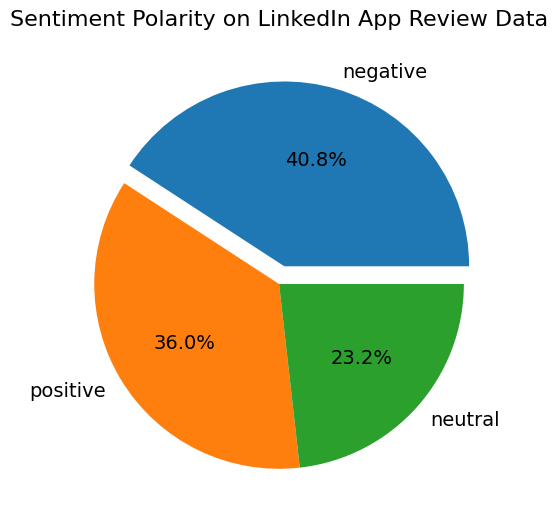

In [47]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik
# (0.1 artinya potongan pertama akan sedikit terpisah, 0 untuk potongan lainnya).
explode = (0.1, 0, 0) # Added a third value for the 'neutral' category

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on LinkedIn App Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

## **5.3 Word Cloud**

In [48]:
# @title Review Positive
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_review' yang hanya berisi review dengan polaritas positif.
positive_review = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_review'.
positive_review = positive_review[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_review' berdasarkan 'polarity_score' secara menurun.
positive_review = positive_review.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_review = positive_review.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_review.index += 1

In [49]:
# @title Review Negative

# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_review' yang hanya berisi review dengan polaritas negatif.
negative_review = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_review'.
negative_review = negative_review[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_review' berdasarkan 'polarity_score' secara menaik (ascending).
negative_review = negative_review.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_review = negative_review[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_review = negative_review.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_review.index += 1

In [50]:
# @title Review Neutral
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'neutral_review' yang hanya berisi review dengan polaritas positif.
neutral_review = clean_df[clean_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_review'.
neutral_review = neutral_review[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'neutral_review' berdasarkan 'polarity_score' secara menurun.
neutral_review = neutral_review.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_review = neutral_review.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_review.index += 1

In [53]:
!pip install wordcloud
# Install the wordcloud library if it's not already installed.

from wordcloud import WordCloud
# Import the WordCloud class from the wordcloud library.
import matplotlib.pyplot as plt
import pandas as pd

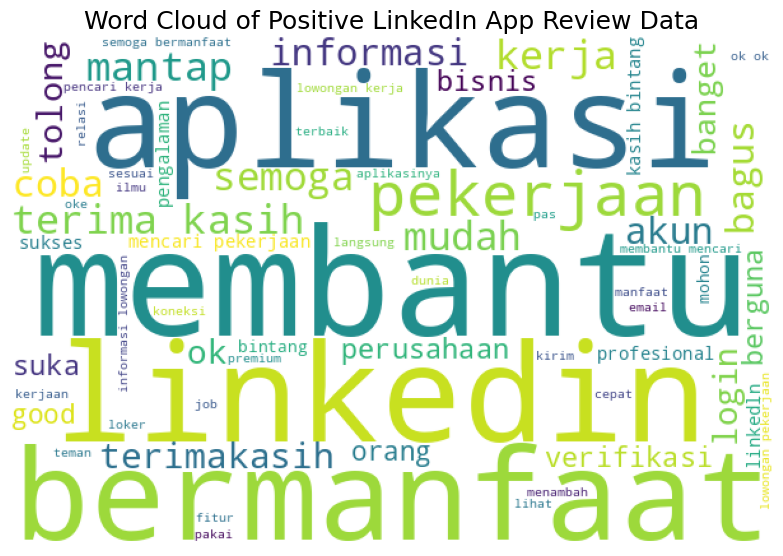

In [54]:
# @title Word of Cloud Positive
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam review positif.
list_words = ''

# Iterasi melalui setiap review dalam kolom 'text_stopword' dari DataFrame 'positive_reviews'.
for review in positive_review['text_stopword']:
    # Iterasi melalui setiap kata dalam review.
    for word in review:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive LinkedIn App Review Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

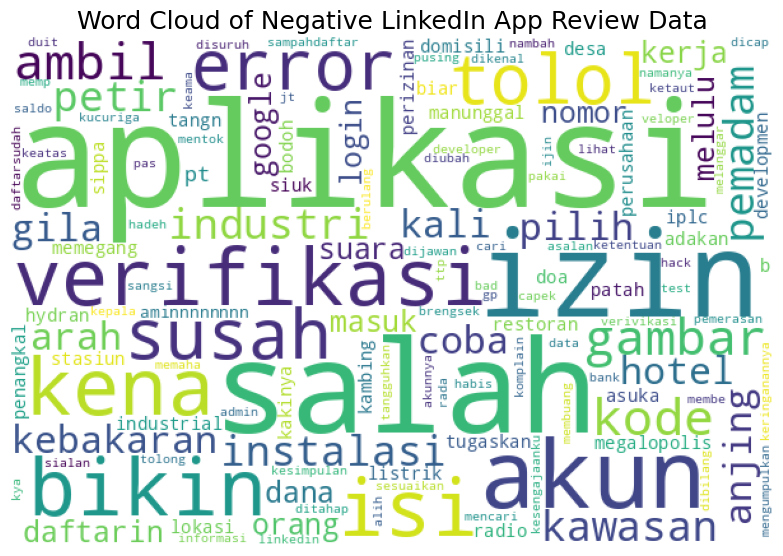

In [55]:
# @title Word of Cloud Negative
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam review negatif.
list_words = ''

# Iterasi melalui setiap review dalam kolom 'text_stopword' dari DataFrame 'negative_reviews'.
for review in negative_review['text_stopword']:
    # Iterasi melalui setiap kata dalam review.
    for word in review:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative LinkedIn App Review Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

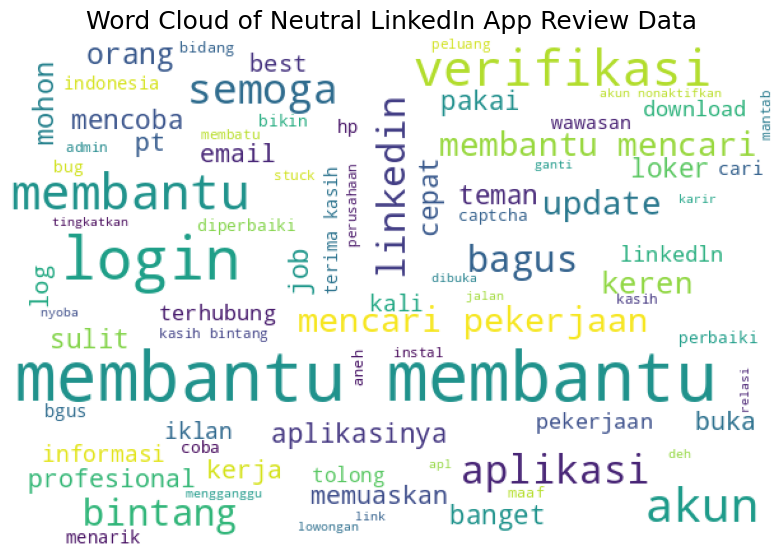

In [56]:
# @title Word of Cloud Neutral
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam review negatif.
list_words = ''

# Iterasi melalui setiap review dalam kolom 'text_stopword' dari DataFrame 'neutral_reviews'.
for review in neutral_review['text_stopword']:
    # Iterasi melalui setiap kata dalam review.
    for word in review:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Neutral LinkedIn App Review Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

## **5.4 Dataset Statistics**

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

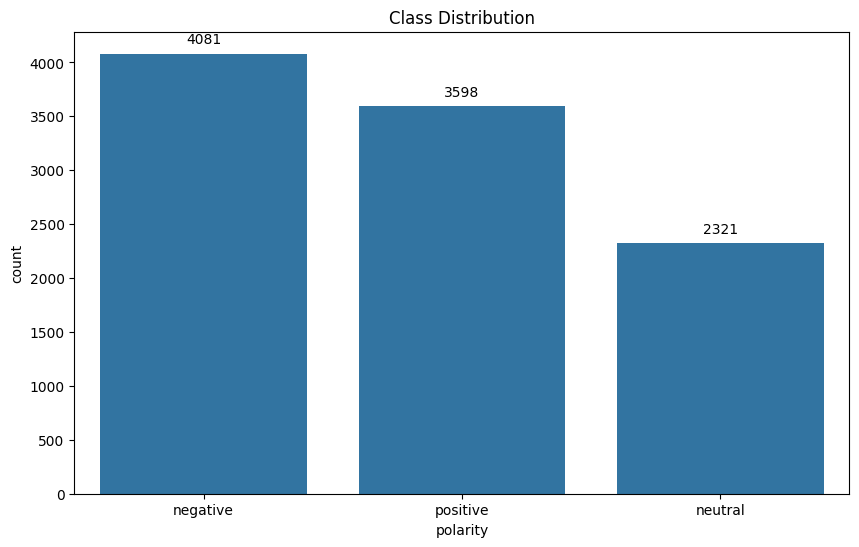

In [58]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

## **5.5 One Hot Encoding**

In [59]:
category = pd.get_dummies(clean_df['polarity'], dtype=int) # Replace df with clean_df
clean_df = pd.concat([clean_df, category], axis=1) # Replace df with clean_df
clean_df = clean_df.drop([
    'content', 'score', 'thumbsUpCount', 'userName', 'text_clean',
    'text_casefoldingText', 'text_slangwords', 'text_tokenizingText', 'text_stopword',
    'polarity'], axis=1) # Replace df with clean_df, and adjust the list of columns to drop

## **5.5 Data Splitting**

In [60]:
# Pisahkan data menjadi fitur (review) dan label (sentimen)
X = clean_df['text_akhir']
# Since 'polarity' column is dropped, use the one-hot encoded columns instead.
y = clean_df[['negative', 'neutral', 'positive']]

In [61]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [62]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,akses,akun,allah,aneh,apapun,aplikasi,aplikasinya,bagus,banget,...,uninstall,update,upload,usaha,valid,verifikasi,verifikasinya,verivikasi,wawasan,web
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.163818,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.156807,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.20996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.199942,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.202560,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.271636,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.578365,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## **5.6 Train Test**

In [63]:
# Bagi data menjadi data latih dan data uji
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [64]:
y_train_sum = y_train.sum().to_dict()
y_test_sum = y_test.sum().to_dict()

y_train_sum['TOTAL'] = X_train.shape[0]
y_test_sum['TOTAL'] = X_test.shape[0]

splitting_df = pd.DataFrame([
    y_train_sum,
    y_test_sum
], index=['Train', 'Test'])

splitting_total = splitting_df.sum().to_frame().T
splitting_total.index = ['TOTAL']
splitting_df = pd.concat([splitting_df, splitting_total])
splitting_df

,negative,neutral,positive,TOTAL
Train,3265,1857,2878,8000
Test,816,464,720,2000
TOTAL,4081,2321,3598,10000


# **6. Model Development**

## **6.1 Tokenizing**

In [65]:
# Convert the sparse matrix to a list of strings
# X_train_texts = [' '.join([str(index) for index in row.indices]) for row in X_train]
# X_test_texts = [' '.join([str(index) for index in row.indices]) for row in X_test]

tokenizer = Tokenizer(num_words=15000, oov_token='x')
# Fit the tokenizer on the list of strings
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
# tokenizer.fit_on_texts(clean_df['text_akhir']

seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)

pad_train = pad_sequences(seq_train, maxlen=250, padding='post')
pad_test = pad_sequences(seq_test, maxlen=250, padding='post')

## **6.2 Callback and Function Initialization**

In [66]:
class stopCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
            print('accuracy and val accuracy > 92%')
            self.model.stop_training = True

stopTraining = stopCallback()

reduceLROP = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2)

In [67]:
def plot_model_accuracy_loss(history, name):
    plt.figure(figsize = (12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Train and Validation Accuracy', fontsize=14, fontweight='bold', pad=10)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(color='lightgray', linestyle='-', linewidth=1, which='major')
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5, which='minor')
    plt.minorticks_on()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} Training and Validation Loss', fontsize=14, fontweight='bold', pad=10)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(color='lightgray', linestyle='-', linewidth=1, which='major')
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5, which='minor')
    plt.minorticks_on()

    plt.show()

## **6.3 LSTM**

In [68]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=15000, output_dim=128, input_length=250),
    tf.keras.layers.LSTM(256),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
], name='LSTM')

model_lstm.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_lstm.summary()

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          1920000   
                                                                 
 lstm (LSTM)                 (None, 256)               394240    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2322563 (8.86 MB)
Trainable params: 2322563 (8.8

In [78]:
h1 = model_lstm.fit(
    pad_train, y_train,
    epochs=10,
    validation_data=(pad_test, y_test),
    callbacks=[reduceLROP, stopTraining],
    verbose=1,
)

Epoch 1/10
250/250 [==============================] - 266s 1s/step - loss: 1.0796 - accuracy: 0.4008 - val_loss: 1.0728 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 2/10
250/250 [==============================] - 268s 1s/step - loss: 1.0761 - accuracy: 0.4016 - val_loss: 1.0729 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 3/10
250/250 [==============================] - 270s 1s/step - loss: 1.0756 - accuracy: 0.4044 - val_loss: 1.0727 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 4/10
250/250 [==============================] - 266s 1s/step - loss: 1.0755 - accuracy: 0.4058 - val_loss: 1.0736 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 5/10
250/250 [==============================] - 267s 1s/step - loss: 1.0746 - accuracy: 0.4054 - val_loss: 1.0730 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 6/10
250/250 [==============================] - 265s 1s/step - loss: 1.0734 - accuracy: 0.4054 - val_loss: 1.0727 - val_accuracy: 0.4080 - lr: 1.0000e-04
Epoch 7/10
250/250 [==============================] - 265s 1

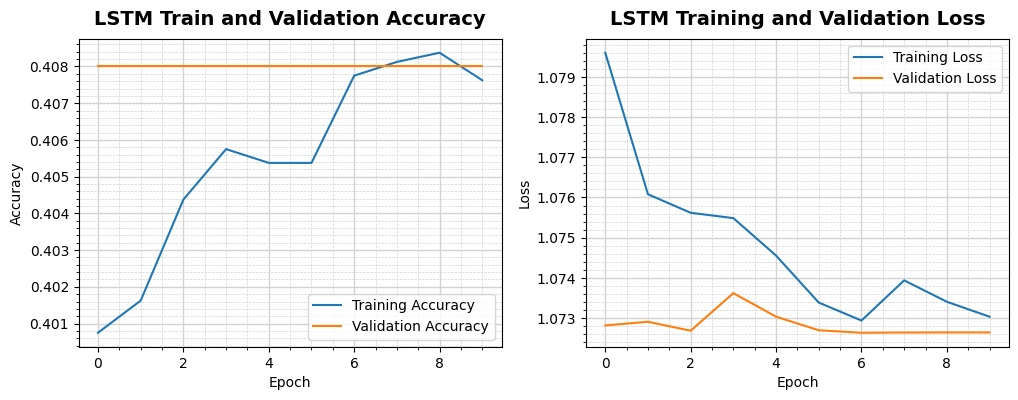

In [79]:
plot_model_accuracy_loss(h1, 'LSTM')

## **6.4 Bi-LSTM**

In [69]:
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=15000, output_dim=256, input_length=250),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, recurrent_dropout=0.2, return_sequences=True)),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, recurrent_dropout=0.2)),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
], name='Bi-LSTM')

model_bilstm.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_bilstm.summary()

Model: "Bi-LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 256)          3840000   
                                                                 
 bidirectional (Bidirection  (None, 250, 256)          394240    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 195 

In [80]:
h2 = model_bilstm.fit(
    pad_train, y_train,
    epochs=10,
    validation_data=(pad_test, y_test),
    callbacks=[reduceLROP, stopTraining],
    verbose=1,
)

Epoch 1/10
250/250 [==============================] - 685s 3s/step - loss: 0.7767 - accuracy: 0.6420 - val_loss: 0.4121 - val_accuracy: 0.8535 - lr: 5.0000e-04
Epoch 2/10
250/250 [==============================] - 655s 3s/step - loss: 0.2965 - accuracy: 0.8991 - val_loss: 0.3331 - val_accuracy: 0.8845 - lr: 5.0000e-04
Epoch 3/10
250/250 [==============================] - 654s 3s/step - loss: 0.1371 - accuracy: 0.9554 - val_loss: 0.3714 - val_accuracy: 0.8925 - lr: 5.0000e-04
Epoch 4/10
250/250 [==============================] - 639s 3s/step - loss: 0.0861 - accuracy: 0.9693 - val_loss: 0.4151 - val_accuracy: 0.8855 - lr: 5.0000e-04
Epoch 5/10
250/250 [==============================] - 653s 3s/step - loss: 0.0519 - accuracy: 0.9843 - val_loss: 0.4002 - val_accuracy: 0.8935 - lr: 5.0000e-05
Epoch 6/10
250/250 [==============================] - 656s 3s/step - loss: 0.0408 - accuracy: 0.9880 - val_loss: 0.4194 - val_accuracy: 0.8940 - lr: 5.0000e-05
Epoch 7/10
250/250 [====================

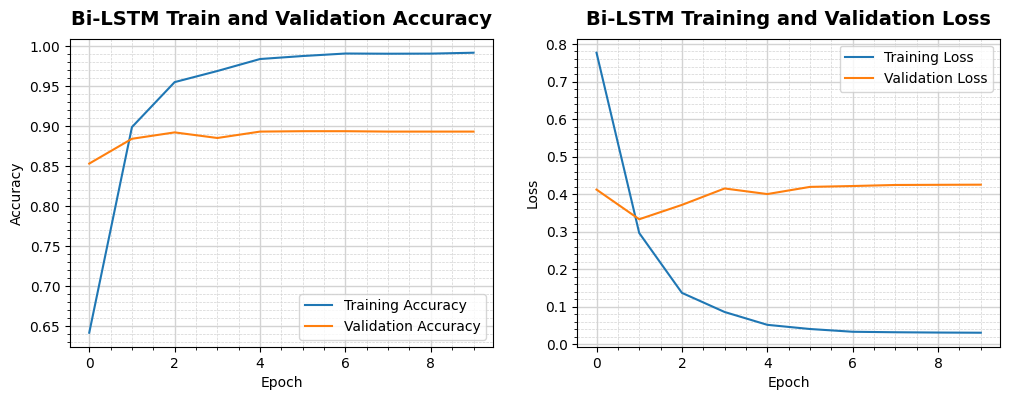

In [81]:
plot_model_accuracy_loss(h2, 'Bi-LSTM')

## **6.5 GRU**

In [70]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=15000, output_dim=128, input_length=250),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')
], name='Bi-GRU')

model_gru.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_gru.summary()

Model: "Bi-GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 128)          1920000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 250, 256)          198144    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 250, 256)          0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 256)               296448    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448

In [76]:
h3 = model_gru.fit(
    pad_train, y_train,
    epochs=10,
    validation_data=(pad_test, y_test),
    callbacks=[reduceLROP, stopTraining],
    verbose=1,
)

Epoch 1/10
250/250 [==============================] - 400s 2s/step - loss: 0.5544 - accuracy: 0.7760 - val_loss: 0.3332 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 2/10
250/250 [==============================] - 415s 2s/step - loss: 0.2163 - accuracy: 0.9293 - val_loss: 0.3260 - val_accuracy: 0.8890 - lr: 0.0010
Epoch 3/10
250/250 [==============================] - 412s 2s/step - loss: 0.1247 - accuracy: 0.9603 - val_loss: 0.3277 - val_accuracy: 0.8980 - lr: 0.0010
Epoch 4/10
250/250 [==============================] - 426s 2s/step - loss: 0.0959 - accuracy: 0.9693 - val_loss: 0.3424 - val_accuracy: 0.8860 - lr: 0.0010
Epoch 5/10
250/250 [==============================] - 458s 2s/step - loss: 0.0639 - accuracy: 0.9769 - val_loss: 0.3860 - val_accuracy: 0.8900 - lr: 1.0000e-04
Epoch 6/10
250/250 [==============================] - 391s 2s/step - loss: 0.0516 - accuracy: 0.9801 - val_loss: 0.4215 - val_accuracy: 0.8900 - lr: 1.0000e-04
Epoch 7/10
250/250 [==============================] - 39

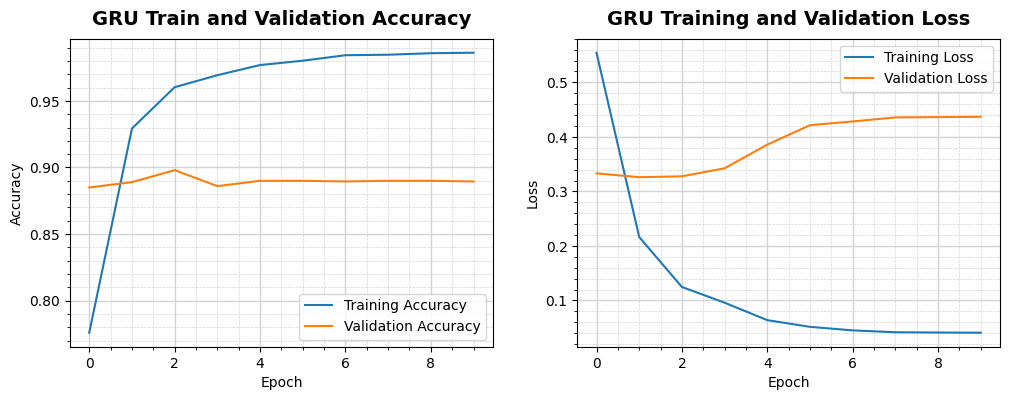

In [77]:
plot_model_accuracy_loss(h3, 'GRU')

# **7. Model Evaluation**

In [82]:
acc_train_lstm = model_lstm.evaluate(pad_train, y_train)[1]
acc_test_lstm = model_lstm.evaluate(pad_test, y_test)[1]

acc_train_bilstm = model_bilstm.evaluate(pad_train, y_train)[1]
acc_test_bilstm = model_bilstm.evaluate(pad_test, y_test)[1]

acc_train_gru = model_gru.evaluate(pad_train, y_train)[1]
acc_test_gru = model_gru.evaluate(pad_test, y_test)[1]

63/63 [==============================] - 22s 349ms/step - loss: 0.4370 - accuracy: 0.8895


In [83]:
results_df = pd.DataFrame({
    'Model': ['LSTM', 'Bi-LSTM', 'GRU'],
    'Accuracy Train': [acc_train_lstm, acc_train_bilstm, acc_train_gru],
    'Accuracy Test': [acc_test_lstm, acc_test_bilstm, acc_test_gru]
})

accuracy_test = results_df[['Model', 'Accuracy Train', 'Accuracy Test']]
accuracy_test.sort_values(by='Accuracy Test', ascending=False)

,Model,Accuracy Train,Accuracy Test
1,Bi-LSTM,0.992500,0.8935
2,GRU,0.990625,0.8895
0,LSTM,0.408125,0.4080


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# abaikan jika sudah terinstal
!pip install pipreqs

# penggunaan secara umum
!pipreqs [options] [<path>]

# tambahkan opsi --force jika sudah terdapat berkas requirements.txt
!pipreqs --force

# tambahkan opsi --print jika hanya ingin menampilkan sebagai output
# tanpa menghasilkan berkas requirements.txt
!pipreqs --print

# tambahkan opsi --scan-notebooks supaya bisa mendeteksi .ipynb
# tanpa option ini, tidak akan mendeteksi berkas notebook
!pipreqs --scan-notebooks

# tambahkan opsi --ignore <dirs> supaya package melewatkan pengecekan
# pada direktori terkait
!pipreqs --ignore env

# tambahkan path untuk mengatur lingkup pengecekan yang dilakukan
!pipreqs "/content/drive/MyDrive/Colab Notebooks/Analyst Sentiment"

!pipreqs "/content/drive/MyDrive/Colab Notebooks/Analyst Sentiment" --force --scan-notebooks

!pip freeze > requirements.txt

!sed -i 's/[Rr]equests/requests/g' /mnt/data/requirements.txt

!cat /mnt/data/requirements.txt

/bin/bash: line 1: path: No such file or directory
INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in /content/requirements.txt
INFO: Not scanning for jupyter notebooks.

INFO: Successfully output requirements
INFO: Not scanning for jupyter notebooks.
INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid p